In [4]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "Chapter 2: classifiers with scikit learn"
# !git push

In [5]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target
print("class labels:",np.unique(y))

class labels: [0 1 2]


In [6]:
  # The np.unique(y) function returned the three unique class labels stored in iris.target

In [7]:
##splitting the dataset into training and testing dataset using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [8]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [9]:
##scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [10]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(x_train_std,y_train)

Perceptron(eta0=0.1, random_state=1)

In [11]:
y_pred=ppn.predict(x_test_std)
print('misclassified examples:%d' % (y_test !=y_pred).sum())


misclassified examples:1


In [12]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "24/07/2025 classifiers using scikit learn"
# !git push


In [13]:
##checking accuracy of model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
      

Accuracy: 0.978


In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np  # Added numpy import which was missing

def plot_decision_regions(x, y, classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                   y=x[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=f'Class {cl}',
                   edgecolor='black')
    
    # highlight test examples
    if test_idx:
        # plot all examples
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1],
                   c='none', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='Test set')

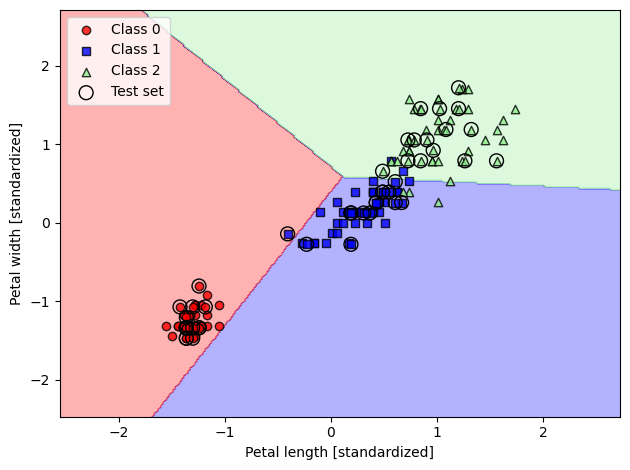

In [15]:
 >>> x_combined_std = np.vstack((x_train_std, x_test_std))
 >>> y_combined = np.hstack((y_train, y_test))
 >>> plot_decision_regions(x=x_combined_std,
 ...
                       y=y_combined,
 ...
 ...
                       classifier=ppn,
                       test_idx=range(105, 150))
 >>> plt.xlabel('Petal length [standardized]')
 >>> plt.ylabel('Petal width [standardized]')
 >>> plt.legend(loc='upper left')
 >>> plt.tight_layout()
 >>> plt.show()

In [16]:
##from this graph wecan clearly see that the classes are not perfectly linearly separable and that why perceptron algorithm
#generally because it only works when the classes are perfectly linearly separable

In [17]:
####From here we will be learning Logistic Regression

In [18]:
#Logistic Regression

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_14456\3582460166.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma (z)$')


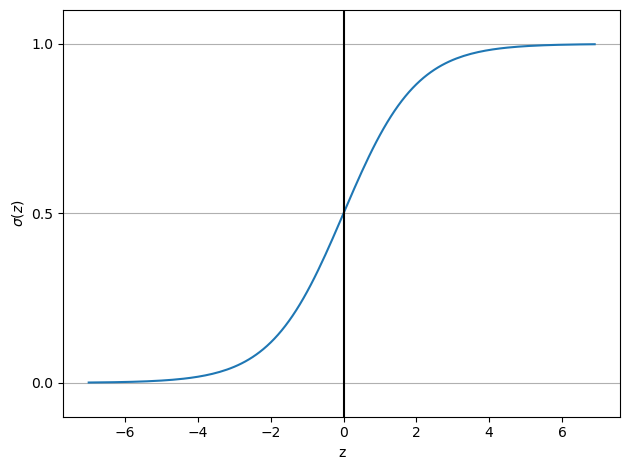

In [19]:
#plotting a sigmoid function for some value 7 to -7
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
sigma_z=sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yogendra singh\AppData\Local\Temp\ipykernel_14456\1387446972.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma(z)$')


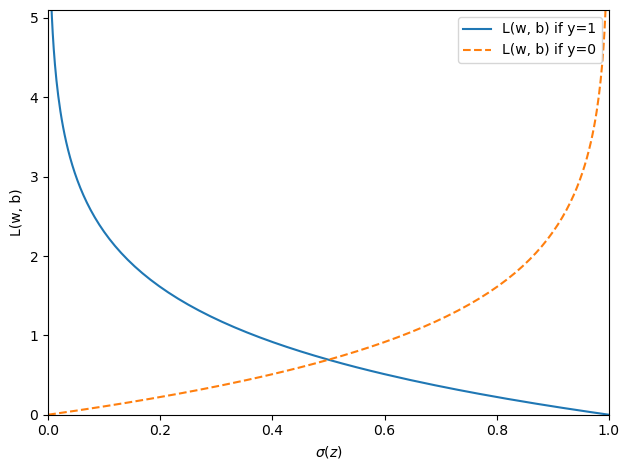

In [20]:
def loss_1(z):
 ...     
 return - np.log(sigmoid(z))
def loss_0(z):
 ...     
 return - np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "25/07/2025:continuous of Logistic regression algorithm"
# !git push

In [22]:
class LogisticRegression:
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # Fixed indentation - moved method outside of __init__
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # Fixed variable name from x_shape to X.shape
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                  - ((1 - y).dot(np.log(1 - output)))
                  / X.shape[0])
            self.losses_.append(loss)
        return self

    # Fixed indentation - moved method outside of __init__
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    # Fixed indentation - moved method outside of __init__
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    # Fixed indentation - moved method outside of __init__
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

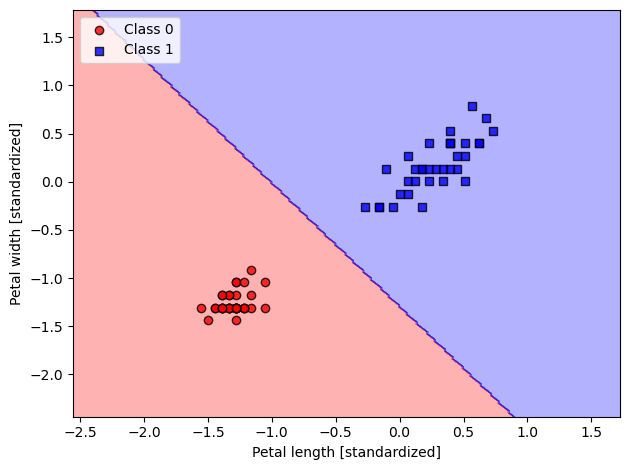

In [23]:
 >>> x_train_01_subset = x_train_std[(y_train == 0) | (y_train == 1)]
 >>> y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
 >>> lrgd = LogisticRegression(eta=0.3,
 ...                             n_iter=1000,
 ...                             random_state=1)
 >>> lrgd.fit(x_train_01_subset,
 ...          y_train_01_subset)
 >>> plot_decision_regions(x=x_train_01_subset,
 ...                       y=y_train_01_subset,
 ...                       classifier=lrgd)
 >>> plt.xlabel('Petal length [standardized]')
 >>> plt.ylabel('Petal width [standardized]')
 >>> plt.legend(loc='upper left')
 >>> plt.tight_layout()
 >>> plt.show()

D:\conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


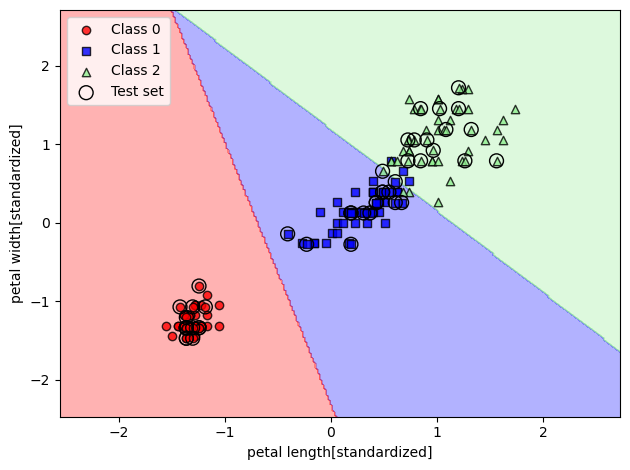

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100.0,solver='lbfgs',
                      multi_class='ovr')
lr.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
lr.predict_proba(x_test_std[:3,:])

array([[2.86741926e-09, 1.75235576e-01, 8.24764422e-01],
       [8.33622300e-01, 1.66377700e-01, 2.28848428e-13],
       [8.50898970e-01, 1.49101030e-01, 1.61549540e-14]])

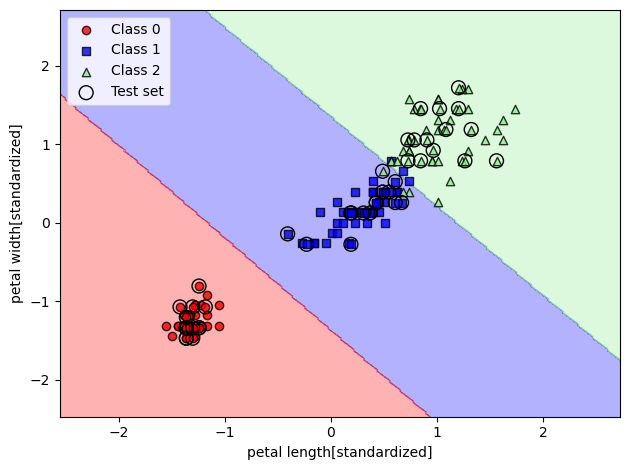

In [26]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(x_train_std,y_train)
plot_decision_regions(x_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length[standardized]')
plt.ylabel('petal width[standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
##we will create a simple dataset that has form of an XOR gate using the logical or function from nu py,where 100 examples will be 
##assigned to class label 1 and 100 to class label 2

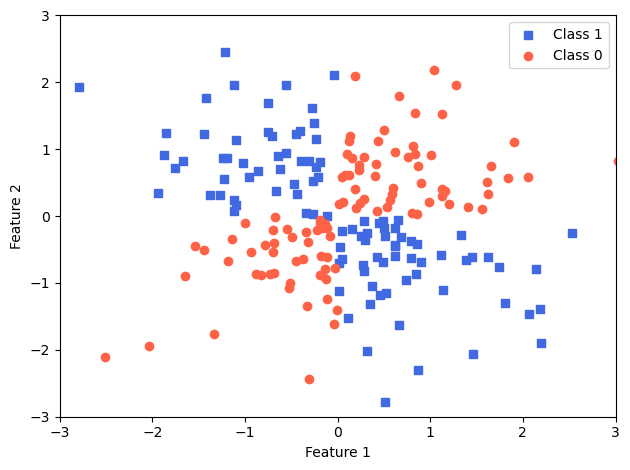

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed (fixed typo from random_seed to random.seed)
np.random.seed(1)

# Generate random data
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

# Create scatter plot
plt.scatter(x_xor[y_xor == 1, 0],
            x_xor[y_xor == 1, 1],
            c='royalblue',  # Fixed typo from 'royalbus' to 'royalblue'
            marker='s',     # Changed 'S' to 's' which is the standard marker code
            label='Class 1')

plt.scatter(x_xor[y_xor == 0, 0],
            x_xor[y_xor == 0, 1],
            c='tomato', 
            marker='o',
            label='Class 0')

# Set plot parameters
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
##Decision Tree Learning

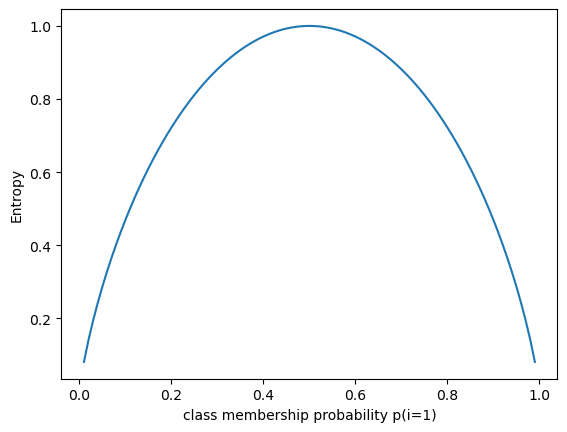

In [30]:
def entropy(p):
    return -p* np.log2(p)-(1-p)*np.log2((1-p))
x=np.arange(0.0,1.0,0.01)
ent=[entropy(p) if p!=0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('class membership probability p(i=1)')
plt.plot(x,ent)
plt.show()

In [31]:
# !git add chapter2_classifiers.ipynb
# !git commit -m "Decision Tree"
# !git push

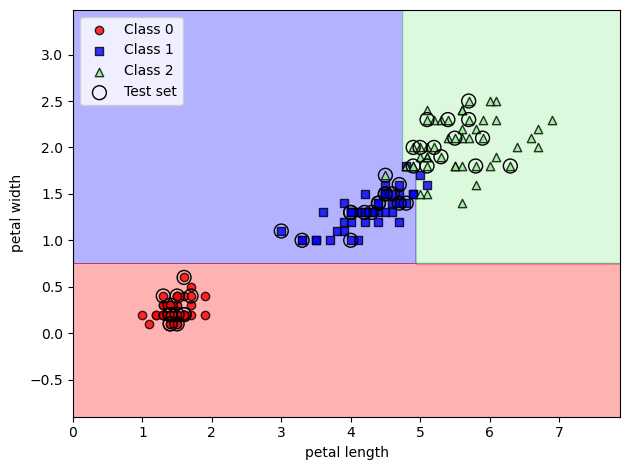

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(criterion='gini',
                                  max_depth=4,
                                  random_state=1)
tree_model.fit(x_train,y_train)
x_combined=np.vstack((x_train,x_test))
y_combined=np.hstack((y_train,y_test))
plot_decision_regions(x_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
#to visaualize the decision tree

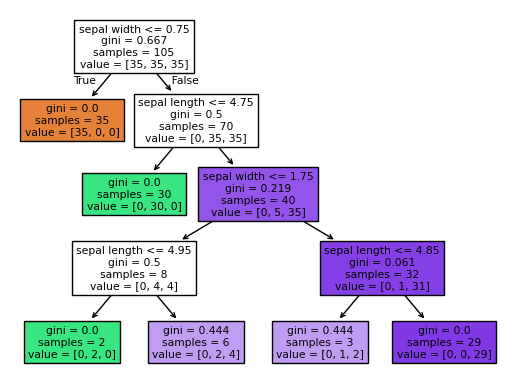

In [34]:
from sklearn import tree
feature_names=['sepal length','sepal width',
               'petal length','petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

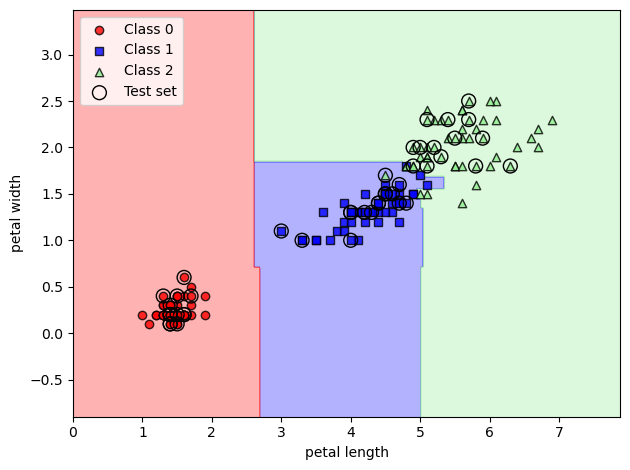

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=25,
                              random_state=1,
                              n_jobs=2)
forest.fit(x_train,y_train)
plot_decision_regions(x_combined,y_combined,
                      classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()